Objective: This work aims to show sufficient skills to apply concepts of Gaussian distribution (normal distribution) in business problems.

Imagine that a free news site would like to know the average age of its readers, where that information would be useful in selecting advertisements within the site. The simplest way would be a small questionnaire that asks the age range of your users, even then we would have problems as many readers would ignore the questionnaire or answer more than once. It is possible to solve the problem of multiple votes by restricting the vote by IP number but we cannot force the user to answer the questionnaire.
 
Since we can't get information from the total population that uses the site, so how do we know how much we can trust the average age group calculated from this small sample? One of the ways to discover the degree of confidence in our sample is to use the concepts of normal distribution and z-score.

During the period of one week, the number of visitors who answered the questionnaire was 3,254 and the average age of visitors to the site is 36 with a standard deviation of 8.2.

What is the mean age with a margin of error for the 98% confidence level?

In [ ]:
# Clean values in memorie
%reset -f

In [ ]:
#importing packages
from scipy.stats import norm
import math as mt
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# average age in questionnarie
mean_q=36
#sample standard deviation of ages in the questionnaire
std_q=8.2
# Level of confidence
prob_q=0.98
#number of ages in questionnaire
n_q=3254

Normal distribution

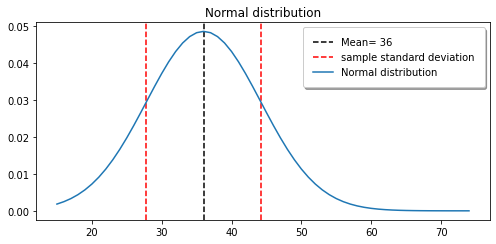

In [ ]:
#Creating Axis with Ages
x_axis=np.arange(15,75,1)
#creating a line that marks the average age of the sample
plt.axvline(x=36, color="black", linestyle="--", label='Mean= 36')
#creating a line that marks the upper limit of the sample standard deviation
plt.axvline(x=mean_q+std_q, color='red', linestyle="--", label='sample standard deviation')
#creating lower limit of sample standard deviation
plt.axvline(x=mean_q-std_q, color='red', linestyle="--")
#normal distribution plot
plt.plot(x_axis, norm.pdf(x_axis, mean_q, std_q),label= 'Normal distribution')
#criando um box com legendas
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
#creating a box with subtitles
plt.title('Normal distribution')
#show plot
plt.show()

Our objective is to calculate the margin of error for the 90% confidence level. First we need to present the margin of error equation as:
\begin{eqnarray}
E=\pm z_c\frac{ s}{\sqrt{n}} 
\end{eqnarray}
where $z_c$ is the critical z-score, n is the number of elements in the sample, and $s$ is the sample standard deviation. The element $z_c$ can be calculated from the uniform distribution.


In [ ]:
#defining critical value of Z-score
def critical_z_value(p):
  #defining uniform distribution
 norm_distribution = norm(loc=0.0, scale=1.0)
 #probability of left part
 left_area = (1.0 - p) / 2.0
 #probability of right part
 right_area = 1.0 - ((1.0 - p) / 2.0)
 #result
 return norm_distribution.ppf(left_area), norm_distribution.ppf(right_area)

In [ ]:
def confidence_interval(p, sample_mean, sample_std, n):
 # Sample size must be greater than 30
 lower, upper = critical_z_value(p)
 E_low = lower * (sample_std / np.sqrt(n))
 E_up = upper * (sample_std / np.sqrt(n))
 return sample_mean + E_low, sample_mean + E_up , E_up


In [ ]:
print(confidence_interval(prob_q, mean_q, std_q, n_q))

(35.66558963010093, 36.33441036989907, 0.33441036989907136)


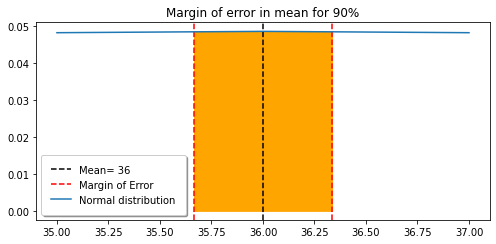

In [ ]:
x_axis=np.arange(36-1,38,1)
x1=np.arange(confidence_interval(prob_q, mean_q, std_q, n_q)[0], confidence_interval(prob_q, mean_q, std_q, n_q)[1]+0.01,0.01)
plt.axvline(x=36, color="black", linestyle="--", label='Mean= 36')
plt.axvline(x=confidence_interval(prob_q, mean_q, std_q, n_q)[1], color='red', linestyle="--", label='Margin of Error')
plt.axvline(x=confidence_interval(prob_q, mean_q, std_q, n_q)[0], color='red', linestyle="--")
plt.plot(x_axis, norm.pdf(x_axis, mean_q, std_q),label= 'Normal distribution')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.fill_between(x1, 0, norm.pdf(x1, mean_q, std_q), color='orange')
plt.title('Margin of error in mean for 98%')
plt.show()

The average age with margin of erroe for 98% confidence is $36 \pm 0.334 $.